In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
tx_user=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/online_retail_II.xlsx')
print(tx_user)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  
0      2009-12-01 07:45:00   6.95 

In [ ]:

#from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans


import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import xgboost as xgb

In [ ]:
tx_user

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
tx_user.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
#converting the type of Invoice Date Field from string to datetime.
tx_user['InvoiceDate'] = pd.to_datetime(tx_user['InvoiceDate'])
#creating YearMonth field for the ease of reporting and visualization
tx_user['InvoiceYearMonth'] = tx_user['InvoiceDate'].map(lambda date: 100*date.year + date.month)
tx_user.describe()
#tx_user['InvoiceYearMonth']

,Quantity,Price,Customer ID,InvoiceYearMonth
count,525461.000000,525461.000000,417534.000000,525461.000000
mean,10.337667,4.688834,15360.645478,200998.831331
std,107.424110,146.126914,1680.811316,26.845455
min,-9600.000000,-53594.360000,12346.000000,200912.000000
25%,1.000000,1.250000,13983.000000,201003.000000
50%,3.000000,2.100000,15311.000000,201007.000000
75%,10.000000,4.210000,16799.000000,201010.000000
max,19152.000000,25111.090000,18287.000000,201012.000000


In [ ]:
tx_user['Country'].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

In [ ]:
#we will be using only UK data
tx_uk = tx_user.query("Country=='United Kingdom'").reset_index(drop=True)
print(tx_uk)

       Invoice StockCode                          Description  Quantity  \
0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1       489434    79323P                   PINK CHERRY LIGHTS        12   
2       489434    79323W                  WHITE CHERRY LIGHTS        12   
3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...        ...       ...                                  ...       ...   
485847  538171     22271                 FELTCRAFT DOLL ROSIE         2   
485848  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
485849  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
485850  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
485851  538171     21931               JUMBO STORAGE BAG SUKI         2   

               InvoiceDate  Price  Customer ID         Country  \
0      2009-12-01 07:45:00   6.95

Segmentation Techniques

You can do many different segmentations according to what you are trying to achieve. If you want to increase retention rate, you can do a segmentation based on churn probability and take actions. But there are very common and useful segmentation methods as well. Now we are going to implement one of them to our business: RFM. RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below:

Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.


Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.


High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.
As the methodology, we need to calculate Recency, Frequency and Monetary Value (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) for each. Let’s jump into coding and see how to do RFM Clustering.

3. Recency
To calculate recency, we need to find out most recent purchase date of each customer and see how many days they are inactive for. After having no. of inactive days for each customer, we will apply K-means* clustering to assign customers a recency score.

In [ ]:
#create a generic user dataframe to keep CustomerID and new segmentation scores
tx_user = pd.DataFrame(tx_user['Customer ID'].unique())
tx_user.columns = ['Customer ID']
tx_user.head()

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0


In [ ]:
tx_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912


In [ ]:
#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = tx_uk.groupby('Customer ID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['Customer ID','MaxPurchaseDate']
tx_max_purchase.head()

,Customer ID,MaxPurchaseDate
0,12346.0,2010-10-04 16:33:00
1,12608.0,2010-10-31 10:49:00
2,12745.0,2010-08-10 10:14:00
3,12746.0,2010-06-30 08:19:00
4,12747.0,2010-12-05 15:38:00


In [ ]:
# Compare the last transaction of the dataset with last transaction dates of the individual customer IDs.
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_max_purchase.head()

,Customer ID,MaxPurchaseDate,Recency
0,12346.0,2010-10-04 16:33:00,66
1,12608.0,2010-10-31 10:49:00,39
2,12745.0,2010-08-10 10:14:00,121
3,12746.0,2010-06-30 08:19:00,162
4,12747.0,2010-12-05 15:38:00,4


In [ ]:
#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['Customer ID','Recency']], on='Customer ID')
tx_user.head()

,Customer ID,Recency
0,13085.0,55
1,13078.0,1
2,15362.0,83
3,18102.0,0
4,18087.0,14


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

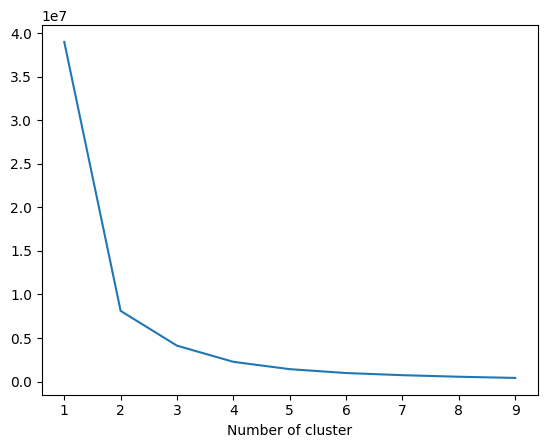

In [ ]:
from sklearn.cluster import KMeans

sse={} # error
tx_recency = tx_user[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
tx_user['RecencyCluster'] = kmeans.fit_predict(tx_user[['Recency']])
tx_user.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Customer ID,Recency,RecencyCluster
0,13085.0,55,3
1,13078.0,1,0
2,15362.0,83,3
3,18102.0,0,0
4,18087.0,14,0


In [ ]:
tx_user.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,1969.0,18.591671,13.686823,0.0,7.00,16.0,29.00,48.0
1,432.0,308.185185,40.775123,252.0,272.75,302.0,357.00,373.0
2,596.0,190.375839,32.403387,135.0,162.00,189.0,218.00,247.0
3,1038.0,78.487476,23.046457,49.0,59.00,72.0,94.75,134.0


In [ ]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [ ]:
tx_user.head()
#tx_user.groupby('RecencyCluster')['Recency'].describe()

,Customer ID,Recency,RecencyCluster
0,13085.0,55,2
1,15362.0,83,2
2,13635.0,72,2
3,14110.0,70,2
4,15413.0,65,2


In [ ]:
#get order counts for each user and create a dataframe with it
tx_frequency = tx_uk.groupby('Customer ID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['Customer ID','Frequency']
tx_frequency.head() #how many orders does a customer have
#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='Customer ID')
tx_user.head()

,Customer ID,Recency,RecencyCluster,Frequency
0,13085.0,55,2,63
1,15362.0,83,2,40
2,13635.0,72,2,105
3,14110.0,70,2,246
4,15413.0,65,2,27


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-21-214dd1d585df>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-21-214dd1d585df>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

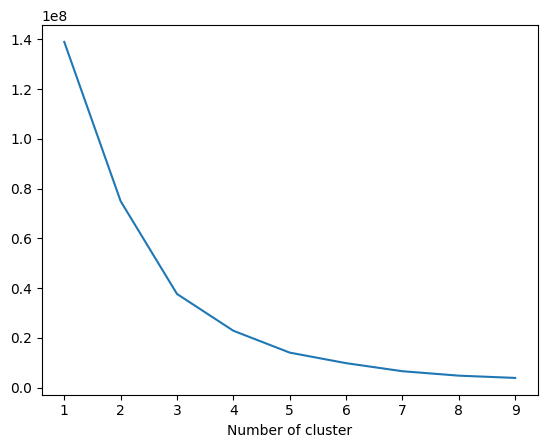

In [ ]:
from sklearn.cluster import KMeans

sse={} # error
tx_recency = tx_user[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
# Applying k-Means
kmeans=KMeans(n_clusters=4)
tx_user['FrequencyCluster']=kmeans.fit_predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency', tx_user, True )
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3383.0,45.030151,38.241440,1.0,15.00,33.0,68.0,153.0
1,575.0,261.833043,93.750707,154.0,187.00,235.0,309.0,535.0
2,71.0,814.239437,297.353396,545.0,607.50,693.0,904.0,1826.0
3,6.0,3120.166667,1158.903519,2226.0,2334.25,2590.0,3611.5,5114.0


In [ ]:
#calculate revenue for each customer
tx_uk['Revenue'] = tx_uk['Price'] * tx_uk['Quantity']
tx_revenue = tx_uk.groupby('Customer ID').Revenue.sum().reset_index()
tx_revenue.head()

,Customer ID,Revenue
0,12346.0,-64.68
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,230.85
4,12747.0,4968.58


In [ ]:
#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='Customer ID')
tx_user.head()

,Customer ID,Recency,Frequency,RecencyCluster,FrequencyCluster,Revenue
0,13085.0,55,63,2,0,1187.08
1,15362.0,83,40,2,0,613.08
2,13635.0,72,105,2,0,1877.19
3,15413.0,65,27,2,0,-2531.38
4,16167.0,49,71,2,0,1149.87


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-27-20936106dc1e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-27-20936106dc1e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

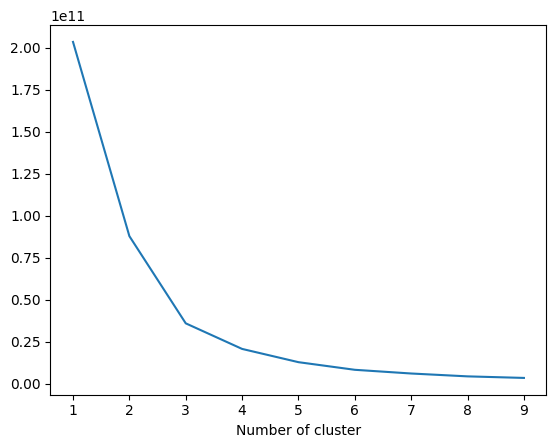

In [ ]:
#Elbow method to find out the optimum number of clusters for K-Means
from sklearn.cluster import KMeans

sse={} # error
tx_recency = tx_user[['Revenue']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_  #cluster names corresponding to recency values
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

From elbow's method, we find that clusters can be 3 or 4. Lets take 4 as the number of clusters

In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=4)
tx_user['RevenueCluster'] = kmeans.fit_predict(tx_user[['Revenue']])

#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3884.0,1053.690049,1333.302179,-25111.09,264.4875,604.555,1403.0650,6804.33
1,134.0,12578.495843,6189.424507,6861.30,7930.7075,10200.765,15098.6425,32445.66
2,16.0,57420.144375,24190.298238,37222.05,40619.5625,48373.380,60773.7750,128172.42
3,1.0,341776.730000,NaN,341776.73,341776.7300,341776.730,341776.7300,341776.73


Cluster 3 has max revenue, cluster 0 has lowest revenue

In [ ]:
#calculate overall score and use mean() to see details
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

<ipython-input-29-ad2f8ed87503>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,308.323256,20.781395,223.604330
1,190.413793,30.417241,426.765640
2,80.337067,48.040733,855.621151
3,23.430020,68.705206,1209.710895
4,15.568345,254.700240,3285.732789
5,12.623762,441.732673,11264.044485
6,8.303030,833.454545,18122.640000
7,6.600000,2034.900000,51334.217000
8,2.333333,1792.000000,148761.653333


In [ ]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value'
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value'
tx_user

,Customer ID,Recency,Frequency,RecencyCluster,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13085.0,55,63,2,0,1187.08,0,2,Low-Value
1,15362.0,83,40,2,0,613.08,0,2,Low-Value
2,13635.0,72,105,2,0,1877.19,0,2,Low-Value
3,15413.0,65,27,2,0,-2531.38,0,2,Low-Value
4,16167.0,49,71,2,0,1149.87,0,2,Low-Value
...,...,...,...,...,...,...,...,...,...
4030,13694.0,8,973,3,2,128172.42,2,7,High-Value
4031,14298.0,10,1228,3,2,39626.87,2,7,High-Value
4032,15311.0,0,2226,3,3,54093.73,2,8,High-Value
4033,17850.0,7,2515,3,3,50414.50,2,8,High-Value


In [ ]:
#Since our feature set is ready, let’s calculate 6 months LTV for each customer which we are going to use for training our model.

#Lifetime Value: Total Gross Revenue - Total Cost

#There is no cost specified in the dataset. That’s why Revenue becomes our LTV directly.

tx_uk

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.00
...,...,...,...,...,...,...,...,...,...,...
485847,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,201012,5.90
485848,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,201012,3.75
485849,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,201012,3.75
485850,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,201012,7.50


In [ ]:
tx_uk['InvoiceDate'].describe()

<ipython-input-32-a12594270851>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                  485852
unique                  23474
top       2010-12-06 16:57:00
freq                      675
first     2009-12-01 07:45:00
last      2010-12-09 20:01:00
Name: InvoiceDate, dtype: object

In [ ]:
#tx_3m = tx_uk[(tx_uk.InvoiceDate >= pd.Timestamp(2011,3,1)) & (tx_uk.InvoiceDate < pd.TImestamp(2011,6,1))].reset_index(drop=True) #3 months time
tx_6m = tx_uk[(tx_uk.InvoiceDate >= pd.Timestamp(2010,1,1)) & (tx_uk.InvoiceDate < pd.Timestamp(2010,12,9))].reset_index(drop=True) # 6 months

In [ ]:
#calculate revenue and create a new dataframe for it
tx_6m['UnitPrice']=tx_6m['Price']/tx_6m['Quantity']
tx_6m['Revenue'] = tx_6m['UnitPrice'] * tx_6m['Quantity']
tx_user_6m = tx_6m.groupby('Customer ID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['Customer ID','m6_Revenue']
tx_user_6m.head()

,Customer ID,m6_Revenue
0,12346.0,559.36
1,12608.0,26.04
2,12745.0,67.98
3,12746.0,62.05
4,12747.0,534.51


In [ ]:
tx_uk.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [ ]:
tx_merge = pd.merge(tx_user, tx_user_6m, on='Customer ID', how='left') #Only people who are in the timeline of tx_user_6m
tx_merge = tx_merge.fillna(0)
tx_graph = tx_merge.query("m6_Revenue < 50000") #because max values are ending at 50,000 as seen in graph above

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Low-Value'")['m6_Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Mid-Value'")['m6_Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'High-Value'")['m6_Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "6m LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#remove outliers
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]
tx_merge.head()

,Customer ID,Recency,Frequency,RecencyCluster,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue
0,13085.0,55,63,2,0,1187.08,0,2,Low-Value,952.12
1,15362.0,83,40,2,0,613.08,0,2,Low-Value,61.03
2,13635.0,72,105,2,0,1877.19,0,2,Low-Value,145.04
4,16167.0,49,71,2,0,1149.87,0,2,Low-Value,263.86
5,13916.0,98,75,2,0,1260.51,0,2,Low-Value,382.32


In [ ]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
tx_merge['LTVCluster'] = kmeans.fit_predict(tx_merge[['m6_Revenue']])

tx_merge.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Customer ID,Recency,Frequency,RecencyCluster,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,13085.0,55,63,2,0,1187.08,0,2,Low-Value,952.12,2
1,15362.0,83,40,2,0,613.08,0,2,Low-Value,61.03,0
2,13635.0,72,105,2,0,1877.19,0,2,Low-Value,145.04,0
4,16167.0,49,71,2,0,1149.87,0,2,Low-Value,263.86,0
5,13916.0,98,75,2,0,1260.51,0,2,Low-Value,382.32,2


In [ ]:
#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,3079.0,107.534483,87.651823,0.00,34.9550,85.160,162.4400,331.55
1,756.0,556.361134,174.392710,332.36,409.8175,524.055,673.8425,1002.24
2,159.0,1461.422465,363.269881,1011.22,1136.1450,1391.320,1724.0200,2424.89


In [ ]:
tx_cluster.head()

,Customer ID,Recency,Frequency,RecencyCluster,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment,m6_Revenue,LTVCluster
0,13085.0,55,63,2,0,1187.08,0,2,Low-Value,952.12,1
1,13916.0,98,75,2,0,1260.51,0,2,Low-Value,382.32,1
2,17742.0,63,70,2,0,1743.37,0,2,Low-Value,455.96,1
3,13110.0,72,108,2,0,1443.30,0,2,Low-Value,397.40,1
4,14080.0,48,80,2,0,1030.13,0,2,Low-Value,436.43,1


In [ ]:
#convert categorical columns to numerical
tx_class = pd.get_dummies(tx_cluster) #There is only one categorical variable segment
tx_class.head()

,Customer ID,Recency,Frequency,RecencyCluster,FrequencyCluster,Revenue,RevenueCluster,OverallScore,m6_Revenue,LTVCluster,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,13085.0,55,63,2,0,1187.08,0,2,952.12,1,0,1,0
1,13916.0,98,75,2,0,1260.51,0,2,382.32,1,0,1,0
2,17742.0,63,70,2,0,1743.37,0,2,455.96,1,0,1,0
3,13110.0,72,108,2,0,1443.30,0,2,397.40,1,0,1,0
4,14080.0,48,80,2,0,1030.13,0,2,436.43,1,0,1,0


In [ ]:
#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

LTVCluster            1.000000
m6_Revenue            0.896864
Frequency             0.802428
FrequencyCluster      0.766757
OverallScore          0.543871
Segment_High-Value    0.465456
Revenue               0.396014
RevenueCluster        0.333978
RecencyCluster        0.298356
Segment_Mid-Value     0.216021
Customer ID          -0.021276
Recency              -0.292906
Segment_Low-Value    -0.375314
Name: LTVCluster, dtype: float64

In [ ]:
#create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [ ]:
#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)

Accuracy of XGB classifier on training set: 0.95
Accuracy of XGB classifier on test set: 0.88


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       150
           1       0.70      0.68      0.69        41
           2       0.71      0.56      0.63         9

    accuracy                           0.88       200
   macro avg       0.78      0.73      0.75       200
weighted avg       0.87      0.88      0.87       200



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#split training and test sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.05, random_state=56)
clf=LogisticRegression()
clf.fit(Xtrain,ytrain)
ypred=clf.predict(Xtest)
acc=accuracy_score(ytest,ypred)
print(acc*100)
print(classification_report(ytest, ypred))

89.0
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       150
           1       0.76      0.71      0.73        41
           2       0.83      0.56      0.67         9

    accuracy                           0.89       200
   macro avg       0.84      0.74      0.78       200
weighted avg       0.89      0.89      0.89       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



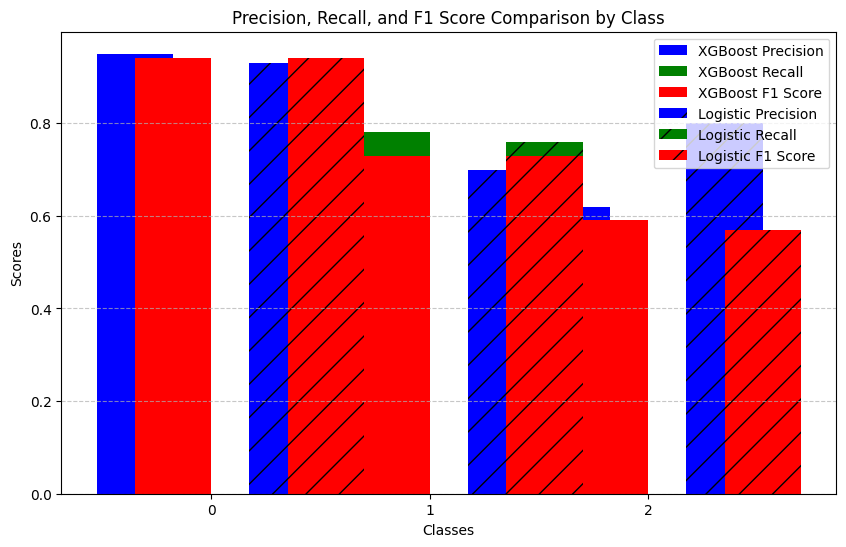

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Replace these with your actual precision, recall, and F1 score values
classes = [0, 1, 2]
precision_xgboost = [0.95, 0.68, 0.62]
recall_xgboost = [0.92, 0.78, 0.56]
f1_xgboost = [0.94, 0.73, 0.59]
precision_logistic_regression = [0.93, 0.70, 0.80]
recall_logistic_regression = [0.94, 0.76, 0.44]
f1_logistic_regression = [0.94, 0.73, 0.57]

# Set the width of the bars
bar_width = 0.35

# Create an array representing the x-axis positions for the bars
x = np.arange(len(classes))

# Create grouped bar charts for precision, recall, and F1 score
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, precision_xgboost, bar_width, label='XGBoost Precision', color='b', align='center')
plt.bar(x - bar_width, recall_xgboost, bar_width, label='XGBoost Recall', color='g', align='edge')
plt.bar(x - bar_width, f1_xgboost, bar_width, label='XGBoost F1 Score', color='r', align='edge')

plt.bar(x + bar_width, precision_logistic_regression, bar_width, label='Logistic Precision', color='b', align='center', hatch='/')
plt.bar(x + bar_width, recall_logistic_regression, bar_width, label='Logistic Recall', color='g', align='edge', hatch='/')
plt.bar(x + bar_width, f1_logistic_regression, bar_width, label='Logistic F1 Score', color='r', align='edge', hatch='/')

# Set the x-axis labels
plt.xlabel('Classes')
plt.xticks(x, classes)

# Set the y-axis label
plt.ylabel('Scores')

# Set the title of the graph
plt.title('Precision, Recall, and F1 Score Comparison by Class')

# Add a legend
plt.legend()

# Show the graph
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
